# Task 03 - Data Analysis & Visualization

Dataset Source: You can use the "Online Retail" dataset available on the UCI Machine Learning Repository. The
dataset can be found at: https://archive.ics.uci.edu/ml/datasets/online+retail

### Import Pyton Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from sklearn import cluster, metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### Read Data and Inspect Data

In [2]:
# import pandas as pd
# dataset = pd.read_csv("/content/gdrive/MyDrive/Mukesh Jayakodi/Programs/Redwing Technical Assign/online+retail/Online Retail.xlsx", encoding="windows_1258")

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Summary Statistics

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.shape

(541909, 8)

In [5]:
df.size

4335272

### Assign data to the right type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Choosing to format the “InvoiceDate” column to a datetime variable, and the “Country” column to a categorical variable.

%%time
#make date format consistent
df['InvoiceDate']=pd.to_datetime((df['InvoiceDate']))

#make country a categorical variable
df["Country"] = df["Country"].astype('category')

CPU times: user 66.5 ms, sys: 0 ns, total: 66.5 ms
Wall time: 70.3 ms


### Missing Values

In [8]:
## This function counts and creates a dataframe containing the nuber of missing values per column.

# Declare the name of the fuction
def count_missing(df):
    # creates a dataframe containing the sum of all missing values
    missing_count = pd.DataFrame(df.isnull().sum(),\
                                 # names column "Count" and sorts values in descending order
                                 columns=['Count']).sort_values(by=['Count'],\
                                                                ascending=False)
    return missing_count

#apply the function to the data
count_missing(df)

,Count
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


### Dealing With Missing Values

In [9]:
# replace missing descriptions with "Missing"
df["Description"] = df["Description"].fillna("Missing")

In [10]:
#delete all rows with a missing "CustomerID"
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

#check that there aren't any missing values
count_missing(df)

,Count
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


### Create a new varialble 'Cancel'

In [11]:
%%time
#create a function that will assign 0 to all variables unless the first character of 'InvoiceNo' in 'C'
def cancel(row):
    value = 0
    if row['InvoiceNo'][0] == 'C':
        value = 1
    return value

# Create a new column 'Cancel' to attach to 'data' and set it to the value returned
  #by the function cancel().

# The code 'axis=1' makes the apply function process the dataset by row,
  #as opposed to by column which is the default option.
df['InvoiceNo']=df['InvoiceNo'].values.astype('str')

df['Cancel'] = df.apply(cancel, axis=1)

# the %%time code returns how much time is needed to run this function.

CPU times: user 3.75 s, sys: 48.8 ms, total: 3.8 s
Wall time: 3.81 s


In [12]:
#check that there are some cancelled orders and that the new column is in the data
df[df['Cancel']== 1].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,1


In [13]:
#check how many cancelled VS non-cancelled orders there are.
canceled = df['Cancel'].value_counts()

# rename the axis so that they show in the picture
canceled = canceled.rename({0: 'Non-canceled', 1: 'Canceled'})

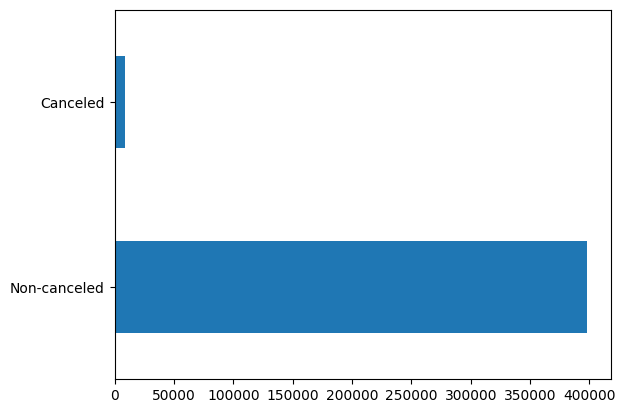

In [14]:
# bar graph of canceled vs non-canceled orders
canceled.plot.barh();

### Transaction Spending :  calculate the total spending of each transaction by multiplying “Quantity” by “UnitPrice”. I then attached the result to a new variable called “Tra_Spending”.

In [15]:
df['Tra_Spending']= (df['Quantity'])*(df['UnitPrice'])
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel,Tra_Spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00


### Grouping data by "CustomerID

In [16]:
#group dataset by cystomerID to start creating customer profiles.
#The following code groups the data by customerID and sum quantity, transaction spending, and number of cancelled orders
aggQ=df.groupby('CustomerID')['Quantity','Tra_Spending', 'Cancel'].sum()

aggQ.head(5)

<ipython-input-16-a25b2ef4ad27>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggQ=df.groupby('CustomerID')['Quantity','Tra_Spending', 'Cancel'].sum()


,Quantity,Tra_Spending,Cancel
CustomerID,,,
12346.0,0,0.00,1
12347.0,2458,4310.00,0
12348.0,2341,1797.24,0
12349.0,631,1757.55,0
12350.0,197,334.40,0


In [17]:
#group by custmer and count unique invoiceNo to see how many oder the customer has placed in the time the data spans.
Inv = df.groupby('CustomerID')['InvoiceNo'].count()
Inv.head(5)

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [18]:
#### Create a varible that shows how much time a person has been a customer.

#group by customerID and select the mininum date (i.e. the date at which the first order was placed)
#as_index=false means that customer ID is a column and not the index
days= df.groupby('CustomerID', as_index=False)['InvoiceDate'].min()

#edit names of columns
days.columns = ['CustomerID', 'Earliest_Invoice']

#create a column with the date of the latest order placed
days['Latest_Invoice'] = pd.to_datetime((df['InvoiceDate']).max())
days.set_index('CustomerID')
days.head(3)


,CustomerID,Earliest_Invoice,Latest_Invoice
0,12346.0,2011-01-18 10:01:00,2011-12-09 12:50:00
1,12347.0,2010-12-07 14:57:00,2011-12-09 12:50:00
2,12348.0,2010-12-16 19:09:00,2011-12-09 12:50:00


In [19]:
#calculate how many days the person has been a customer by subtracting the date of the latest invoice
# to the date of the first invoice
days['days_as_customer'] = 1 + (days.Latest_Invoice-days.Earliest_Invoice).astype('timedelta64[D]')

#delete earliest invoice and laterst invoice columns
days.drop(['Earliest_Invoice', 'Latest_Invoice'], axis=1, inplace=True)
days.head()

,CustomerID,days_as_customer
0,12346.0,326.0
1,12347.0,367.0
2,12348.0,358.0
3,12349.0,19.0
4,12350.0,310.0


In [20]:
#grouped data by customerID and pasted the value of 'Country'
country = df.groupby('CustomerID')['Country'].first()
country.head(3)

CustomerID
12346.0    United Kingdom
12347.0           Iceland
12348.0           Finland
Name: Country, dtype: category
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA',
                          'United Arab Emirates', 'United Kingdom', 'Unspecified']

In [21]:
#group by 'customerID' and average unitprice to see if the person buys expensive items or not
meanex = df.groupby('CustomerID')['UnitPrice'].mean()
meanex.head(3)

CustomerID
12346.0    1.040000
12347.0    2.644011
12348.0    5.764839
Name: UnitPrice, dtype: float64

In [22]:
# create list of datafames to join that have the same index
to_join=[Inv, country, meanex]
# use join() to join aggQ with the three dataframes listed above
joined = aggQ.join(to_join)

joined = joined.join(days.set_index('CustomerID'))

# edit column names
joined.columns = ['total_quantity', 'total_spending',\
                    'total_cancelled_orders', 'total_orders_placed',\
                    'country_of_origin', 'average_price_of_items', 'days_as_customer']

In [23]:
#delete all negative values
joined = joined.drop(joined[(joined.total_quantity < 0)].index)
joined = joined.drop(joined[(joined.total_spending < 0)].index)

The new dataset contains the following variables:

CustomerID: customer unique identifier

total_quantity: total number of items purchased by customer

total_spending: total amount spent by the customer

total_cancelled_orders: total number of orders cancelled by the customer

total_orders_placed: total number of orders placed by the customer

country_of_origin: country of origin of the customer

average_price_of_items: average price of items purchased

days_as_customer: days between first and last orders placed by the customer





In [24]:
# look at first rows of data set
joined.head()

,total_quantity,total_spending,total_cancelled_orders,total_orders_placed,country_of_origin,average_price_of_items,days_as_customer
CustomerID,,,,,,,
12346.0,0,0.00,1,2,United Kingdom,1.040000,326.0
12347.0,2458,4310.00,0,182,Iceland,2.644011,367.0
12348.0,2341,1797.24,0,31,Finland,5.764839,358.0
12349.0,631,1757.55,0,73,Italy,8.289041,19.0
12350.0,197,334.40,0,17,Norway,3.841176,310.0


# Data Visualization

**How many customers are in the dataset?**

In [25]:
# look at the shape of the dataset joined.
# this gives us the number of customers in the dataset because its rows represent a customer.
joined.shape


(4329, 7)

**Where are they from?**

<Axes: >

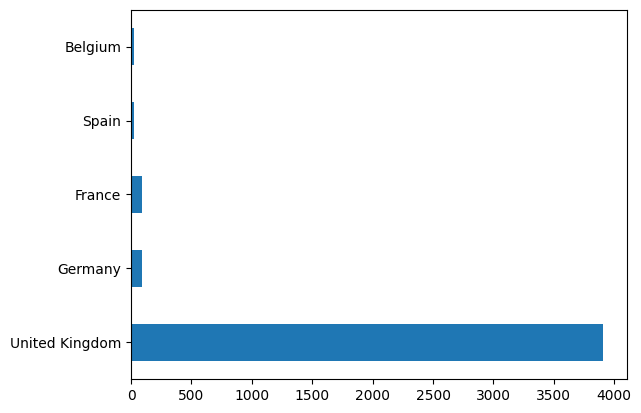

In [26]:
# return the top 5 countries from which customers are from by
# counting the frequency of each country of origin and plotting a horizontal bar graph
joined['country_of_origin'].value_counts()[:5].plot(kind='barh')

**How many orders were placed?**

In [27]:
#check how many unique order numbers are in the original dataset "data"
df['InvoiceNo'].unique().shape

(22190,)

In [28]:
#check from how many countries orders are placed from

# select country column unique values and return the shape of the table.
joined['country_of_origin'].unique().shape

(37,)

**Where are the orders placed from?**

<Axes: >

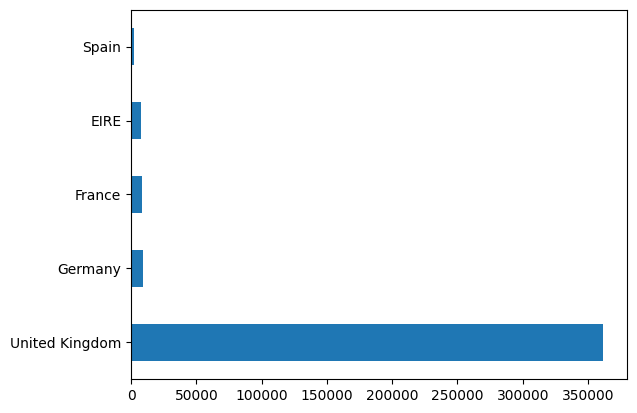

In [29]:
#code returns the first 5 coutries from which orders are placed from.
df['Country'].value_counts()[:5].plot(kind='barh')

**Which countries bring the most revenue?**

<timed exec>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.


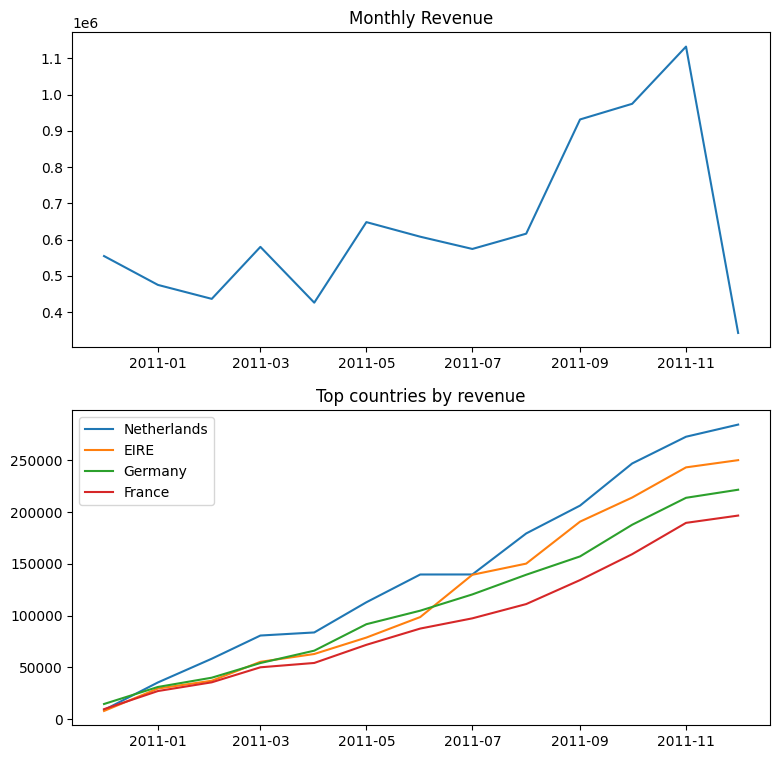

CPU times: user 1.25 s, sys: 124 ms, total: 1.37 s
Wall time: 1.3 s


In [30]:
%%time
# make a copy of the dataset
df_1 = df

# split date variable in "year", "month", "day", "hour", "minute", "week" to make it easier to plot
df_1['Date'] = df['InvoiceDate'].dt.date
df_1['Day'] = df['InvoiceDate'].dt.day
df_1['Month'] = df['InvoiceDate'].dt.month
df_1['Year'] = df['InvoiceDate'].dt.year
df_1['Hour'] = df['InvoiceDate'].dt.hour
df_1['Week'] = df['InvoiceDate'].dt.week
df_1['Minute'] = df['InvoiceDate'].dt.minute

#set up graph
fig, ax = plt.subplots(2,1, figsize=(9, 9))

### create a dataframe "sales" which is grouped by date and shows the sum of all transaction spending in one month.

## subset data_1 to include year, month and transaction spending.
## group the subset by year and month and sum transaction spending.
sales = df_1[['Year', 'Month', 'Tra_Spending']].groupby(['Year', 'Month']).sum().reset_index()

#create a variable called 'Date' which contains year, month and day
#set day to be one to stand for the start of the month.
sales['Day'] = 1
#convert 'Date' to pd datetime object
sales['Date'] = pd.to_datetime(sales[['Year', 'Month', 'Day']])

#set it as the index of the dataframe
sales = sales.set_index('Date')
#delete year, month and day columns
sales = sales.drop(['Day', 'Month', 'Year'], axis=1)

#create a plot of sales.
ax[0].plot(sales)
#set the title to 'Monthly revenue'
ax[0].set_title('Monthly Revenue')

### Create a dataframe "top_country"
##  subset data_1 to contain transaction spending and country
#   group by country and sum the transaction spending
top_country = df_1[['Tra_Spending', 'Country']]\
                .groupby(['Country']).sum().reset_index().sort_values\
                (by='Tra_Spending', ascending=False)['Country'][1:5]

#crate a loop that itarates for each country in the dataframe top_country
for c in top_country:
    sales = df_1[df_1['Country'] == c]
    #subgroup sales and group by year and month.
    sales = sales[['Year', 'Month', 'Tra_Spending']].groupby(['Year', 'Month']).sum().reset_index()
    #set day to 1
    sales['Day'] = 1
    #create date with day, month and year
    sales['Date'] = pd.to_datetime(sales[['Day', 'Month', 'Year']])
    #set index of sales to be 'Date'
    sales = sales.set_index('Date')
    #delete columns year, month, and day
    sales = sales.drop(['Year', 'Month', 'Day'], axis=1)
    #plot
    ax[1].plot(sales.cumsum(), label=c)
    #this line adds a legend to the graph
    ax[1].legend()
    #this line sets the title of the graph
    ax[1].set_title('Top countries by revenue')

plt.show()

# Analysis

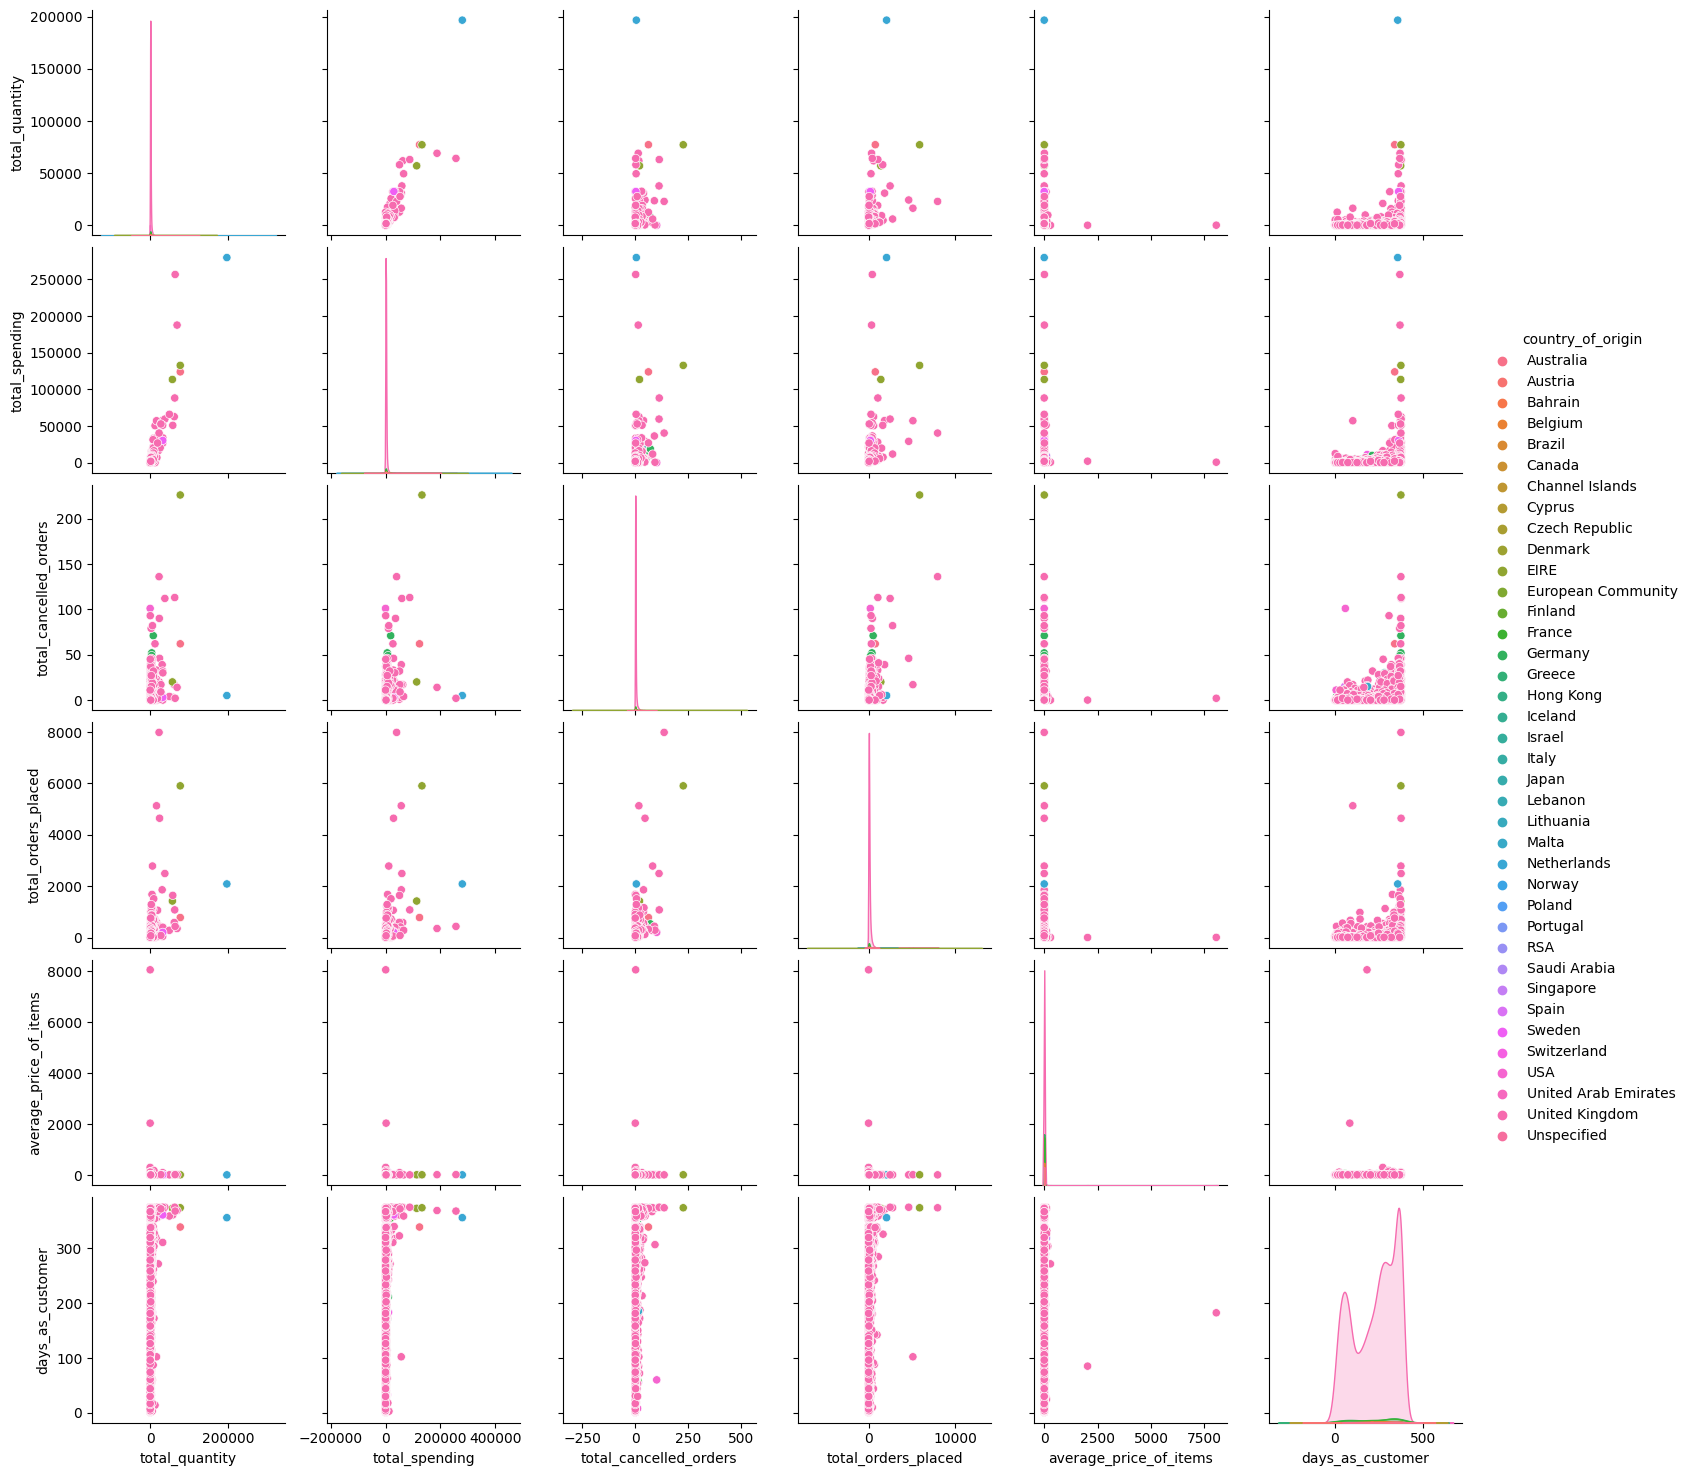

In [31]:
#pairplot gives you a scattered plot of all pairs of variables.
# hue = country of origin colors each observation differently depending
  # on their country of origin
sns.pairplot(joined, kind='scatter', hue= 'country_of_origin');

In [32]:
# scale dataset

#select numerical variables to scale
num_cols= ['total_quantity', 'total_spending',\
           'total_cancelled_orders', 'total_orders_placed',\
           'average_price_of_items', 'days_as_customer']

#subset dataset to contain only numerical variables
joined_toscale = joined[num_cols]

#scale dataset
joined_scaled = pd.DataFrame(preprocessing.scale(joined_toscale),
                           index=joined_toscale.index,
                           columns=joined_toscale.columns)

#add country of origin variable for coloring of pairplot
joined_scaled["country_of_origin"]= joined["country_of_origin"]
joined_scaled.head()

,total_quantity,total_spending,total_cancelled_orders,total_orders_placed,average_price_of_items,days_as_customer,country_of_origin
CustomerID,,,,,,,
12346.0,-0.241563,-0.232608,-0.138582,-0.393792,-0.039814,0.852678,United Kingdom
12347.0,0.282089,0.289446,-0.274465,0.377315,-0.027125,1.199065,Iceland
12348.0,0.257164,-0.014915,-0.274465,-0.269558,-0.002436,1.123029,Finland
12349.0,-0.107135,-0.019722,-0.274465,-0.089633,0.017533,-1.740995,Italy
12350.0,-0.199594,-0.192103,-0.274465,-0.329533,-0.017654,0.717503,Norway


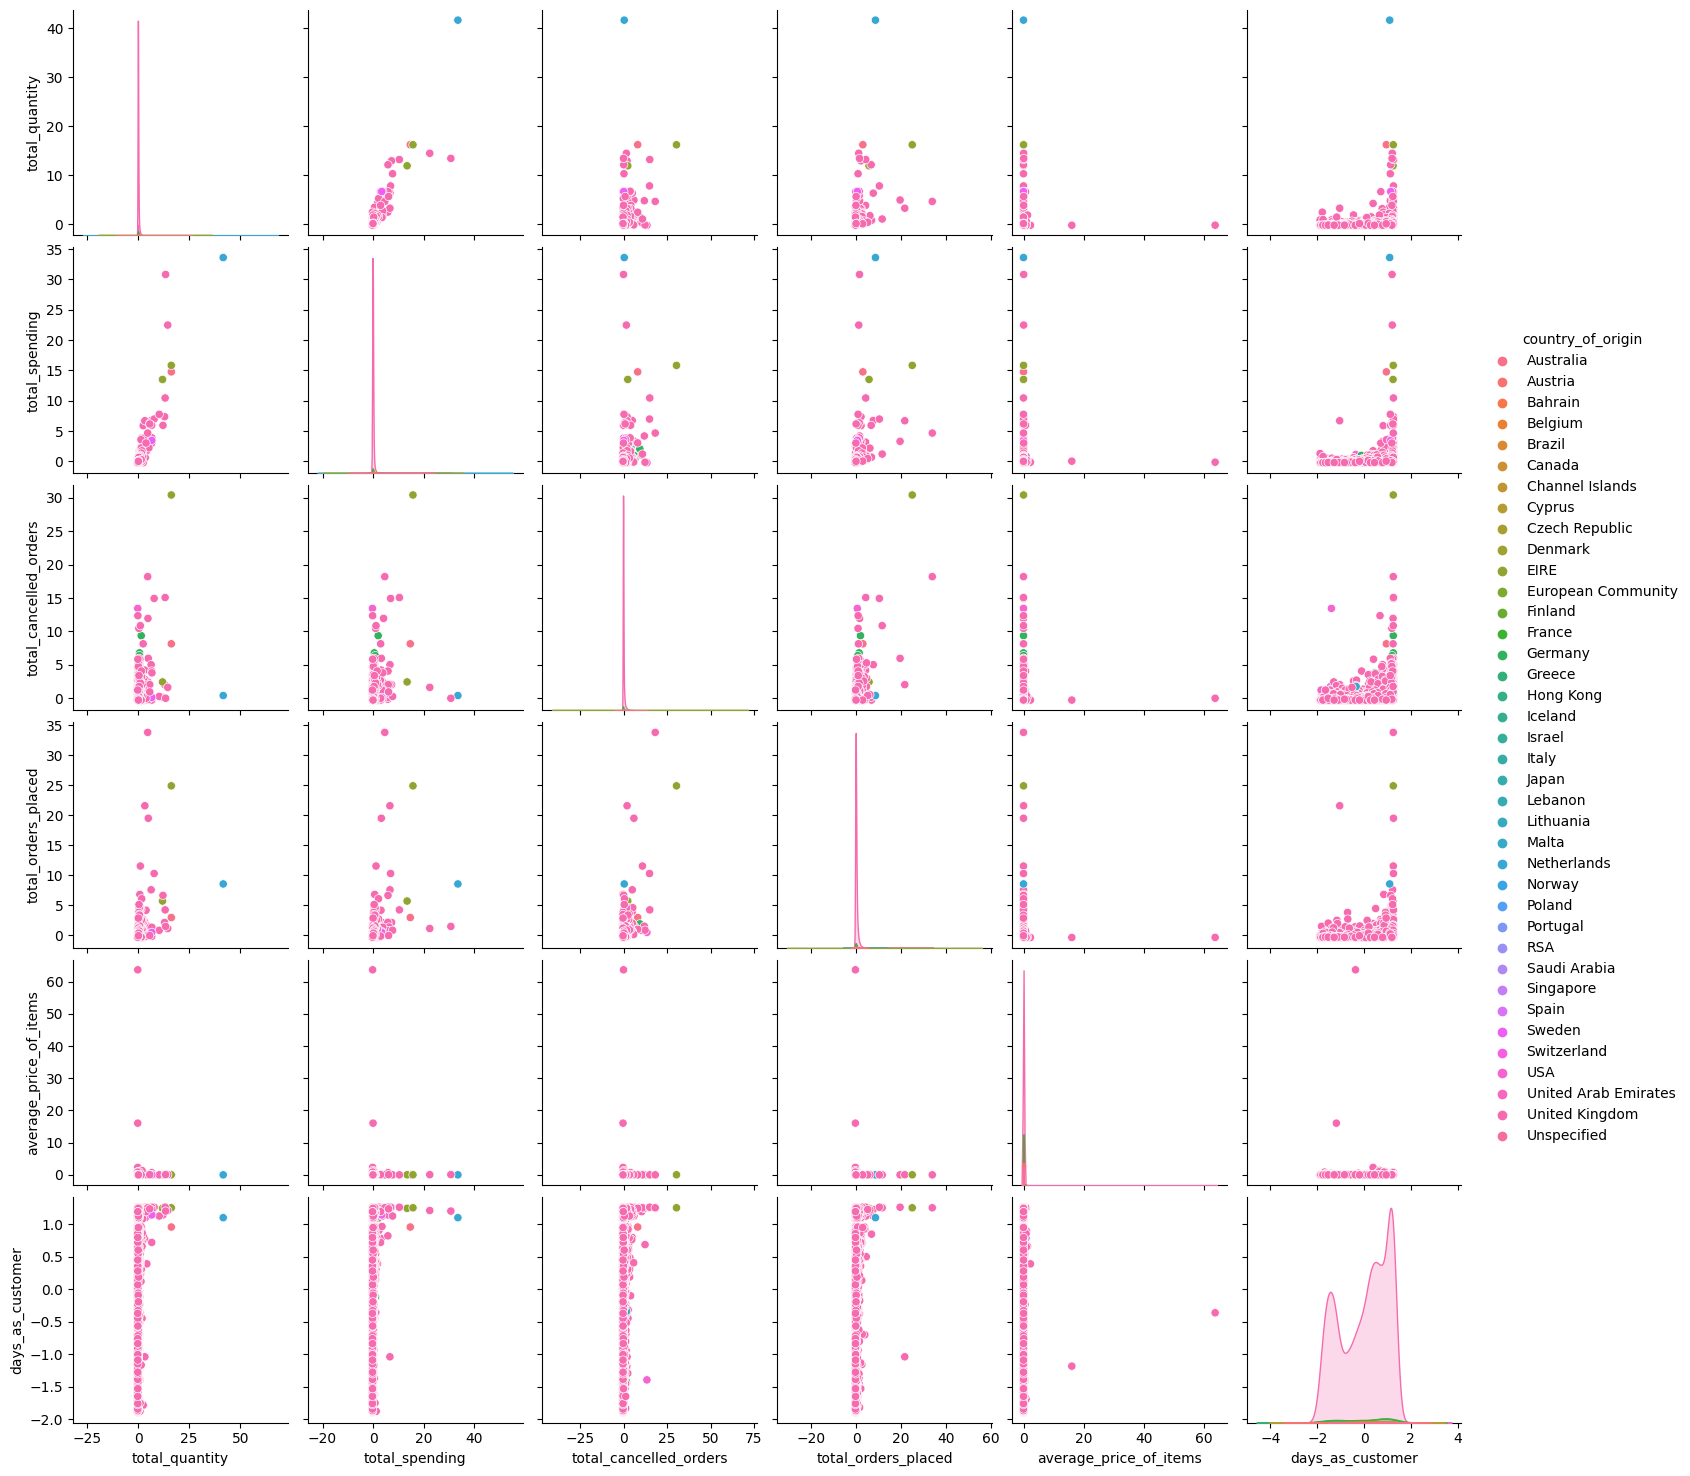

In [33]:
# new pairplot
sns.pairplot(joined_scaled, kind='scatter', hue= 'country_of_origin');